In [3]:
#importing necessary packages

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
#initializing few parameters

batch_size = 128
num_classes = 10
epochs = 15

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# splitting of images between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


In [6]:
# condition to see what format the data is in (channels_first or channels_last)
#Normalzinz the data by dividing it by 255

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# Converting the data into categorical form
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [0]:
model = Sequential()
#layer 1
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
#layer 2
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#layer 3
model.add(Conv2D(32, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 320s 5ms/step - loss: 0.5113 - acc: 0.8359 - val_loss: 0.1482 - val_acc: 0.9555
Epoch 2/15
60000/60000 [==============================] - 316s 5ms/step - loss: 0.2817 - acc: 0.9091 - val_loss: 0.1364 - val_acc: 0.9569
Epoch 3/15
60000/60000 [==============================] - 316s 5ms/step - loss: 0.2363 - acc: 0.9245 - val_loss: 0.1129 - val_acc: 0.9653
Epoch 4/15
60000/60000 [==============================] - 315s 5ms/step - loss: 0.2122 - acc: 0.9315 - val_loss: 0.1125 - val_acc: 0.9641
Epoch 5/15
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1958 - acc: 0.9364 - val_loss: 0.1252 - val_acc: 0.9609
Epoch 6/15
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1816 - acc: 0.9415 - val_loss: 0.0941 - val_acc: 0.9693
Epoch 7/15
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1714 - acc: 0.9446 - val_loss: 0.0883 - 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()

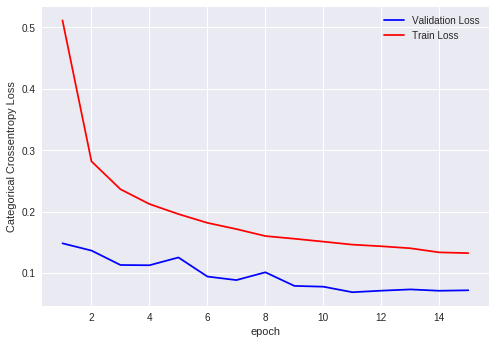

In [11]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [12]:
model = Sequential()
#layer 1
model.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5),padding='same'))
#layer 2
model.add(Conv2D(16, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model.add(Dropout(0.4))
#layer 3
model.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
#layer 4
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
#layer 5
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3),padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 16)          3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 32)          12832     
__________

In [13]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 62s 1ms/step - loss: 1.7458 - acc: 0.3110 - val_loss: 1.0759 - val_acc: 0.5946
Epoch 2/15
60000/60000 [==============================] - 61s 1ms/step - loss: 1.1669 - acc: 0.5635 - val_loss: 0.5746 - val_acc: 0.8371
Epoch 3/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.9234 - acc: 0.6890 - val_loss: 0.3768 - val_acc: 0.9074
Epoch 4/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.7669 - acc: 0.7557 - val_loss: 0.3058 - val_acc: 0.9265
Epoch 5/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.6934 - acc: 0.7898 - val_loss: 0.2495 - val_acc: 0.9417
Epoch 6/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.6441 - acc: 0.8106 - val_loss: 0.2222 - val_acc: 0.9449
Epoch 7/15
60000/60000 [==============================] - 61s 1ms/step - loss: 0.6153 - acc: 0.8215 - val_loss: 0.1931 - val_acc

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18077380894422532
Test accuracy: 0.9552


Test score: 0.18077380894422532
Test accuracy: 0.9552


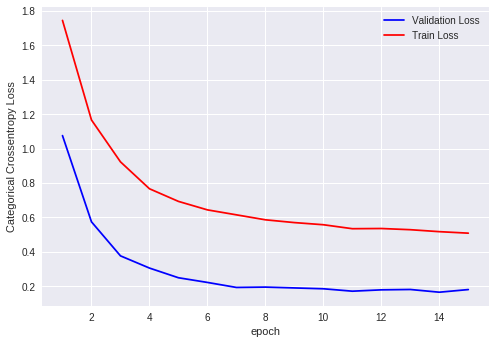

In [15]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [16]:
# Initialising the model
model = Sequential()
#layer 1
model.add(Conv2D(8, kernel_size=(2,2), padding='same', activation='relu', input_shape=input_shape))
#layer 2
model.add(Conv2D(16, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#layer 3
model.add(Conv2D(32, (2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.4))
#layer 4
model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
#layer 5
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#layer 6
model.add(Conv2D(256, (2,2), padding='same', activation='relu'))
#layer 7
model.add(Conv2D(512, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 8)         40        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 16)        528       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          8256      
__________

In [17]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 191s 3ms/step - loss: 0.4678 - acc: 0.8502 - val_loss: 0.1081 - val_acc: 0.9672
Epoch 2/15
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1382 - acc: 0.9591 - val_loss: 0.0545 - val_acc: 0.9819
Epoch 3/15
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0989 - acc: 0.9701 - val_loss: 0.1179 - val_acc: 0.9693
Epoch 4/15
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0832 - acc: 0.9754 - val_loss: 0.0454 - val_acc: 0.9856
Epoch 5/15
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0744 - acc: 0.9773 - val_loss: 0.0513 - val_acc: 0.9856
Epoch 6/15
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0667 - acc: 0.9800 - val_loss: 0.0400 - val_acc: 0.9888
Epoch 7/15
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0591 - acc: 0.9828 - val_loss: 0.0315 - 

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028039084709129018
Test accuracy: 0.9919


Test score: 0.028039084709129018
Test accuracy: 0.9919


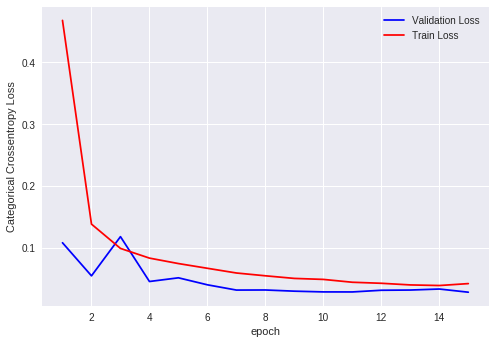

In [19]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [1]:
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MLP_MODEL", "TRAIN_ACCURACY", "TEST_ACCURACY"]

x.add_row(["CNN with 3 conv layers and kernel size of 3*3", 0.9569, 0.9778])
x.add_row(["CNN with 5 conv layers and kernel size of 5*5", 0.8599, 0.9552])
x.add_row(["CNN with 7 conv layers and Kernel size of 2*2", 0.9877, 0.9919])

print('\t\t\tConvolutional Neural Network ')
print(x)

			Convolutional Neural Network 
+-----------------------------------------------+----------------+---------------+
|                   MLP_MODEL                   | TRAIN_ACCURACY | TEST_ACCURACY |
+-----------------------------------------------+----------------+---------------+
| CNN with 3 conv layers and kernel size of 3*3 |     0.9569     |     0.9778    |
| CNN with 5 conv layers and kernel size of 5*5 |     0.8599     |     0.9552    |
| CNN with 7 conv layers and Kernel size of 2*2 |     0.9877     |     0.9919    |
+-----------------------------------------------+----------------+---------------+


# Observation

1) CNN works bettre for images related data and the number of epochs taken to get the best accuracy is comparatively lower than epochs in MLP.

2) In the above CNN architecture the model network with 7 conv. layers gave the best accuracy of 99.19% for test data.